In [1]:
import pandas as pd

In [2]:
pd.read_csv('housing.csv')

df = pd.read_csv('housing.csv')

In [3]:
df.head


<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [4]:
round(df['price'].describe(), 2).reset_index()

,index,price
0,count,545.00
1,mean,4766729.25
2,std,1870439.62
3,min,1750000.00
4,25%,3430000.00
5,50%,4340000.00
6,75%,5740000.00
7,max,13300000.00


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates(inplace=True)

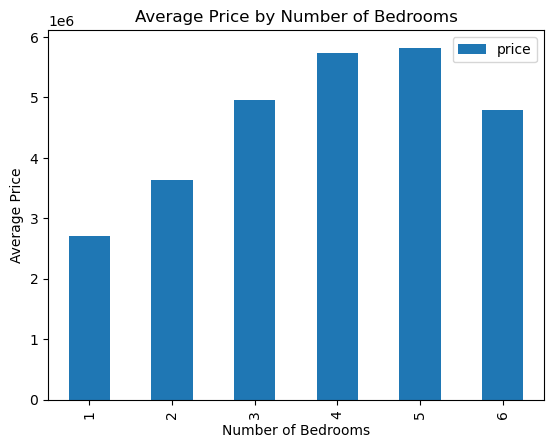

In [7]:
from matplotlib import pyplot as plt


df.groupby('bedrooms').agg({'price': 'mean', 'bathrooms': 'mean'}).reset_index().plot(x='bedrooms', y='price', kind='bar')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


In [8]:
x = df[['area', 'bedrooms', 'bathrooms', 'stories']]
y = df['price']

In [9]:
x


,area,bedrooms,bathrooms,stories
0,7420,4,2,3
1,8960,4,4,4
2,9960,3,2,2
3,7500,4,2,2
4,7420,4,1,2
...,...,...,...,...
540,3000,2,1,1
541,2400,3,1,1
542,3620,2,1,1
543,2910,3,1,1


In [10]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_train.shape

(436, 4)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr.score(x_test_scaled, y_test)
lr.predict(x_test_scaled)
lr.coef_
lr.intercept_
y_pred = lr.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [15]:
import joblib
joblib.dump(lr, 'housing_model.pkl')


['housing_model.pkl']

In [16]:
x.columns


Index(['area', 'bedrooms', 'bathrooms', 'stories'], dtype='object')

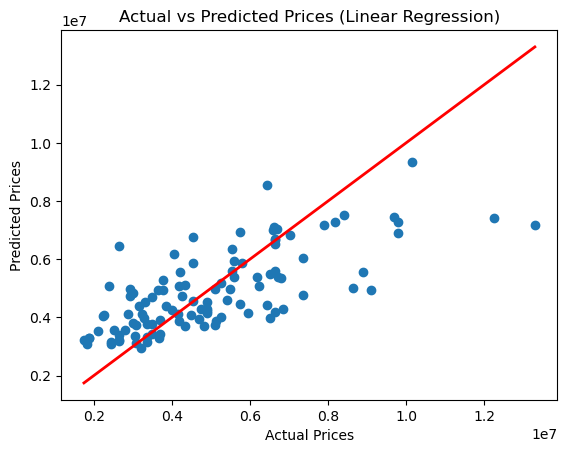

In [17]:
from matplotlib import pyplot as plt

# Ensure y_test and y_pred are defined
try:
	y_test
	y_pred
except NameError:
	raise NameError("Please run the cells that define 'y_test' and 'y_pred' before running this cell.")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

In [18]:
# Display the actual values
print("Actual Prices (y_test):")
print(y_test.values)

# Display the predicted values
print("Predicted Prices (y_pred):")
print(y_pred)

Actual Prices (y_test):
[ 4060000  6650000  3710000  6440000  2800000  4900000  5250000  4543000
  2450000  3353000 10150000  2660000  3360000  3360000  2275000  2660000
  2660000  7350000  2940000  2870000  6720000  5425000  1890000  5250000
  4193000 12250000  3080000  5110000  9800000  2520000  6790000  3500000
  6650000  2940000  3325000  4200000  4900000  3290000  3500000  2380000
  5495000  3675000  6650000  4907000  3150000  4480000  6580000  5740000
  3003000  1820000  8400000  2450000  4270000  4007500  3234000  1750000
  9800000  2100000  4340000  3045000  3850000  3500000  4753000  3080000
  4550000  6510000  6685000  5110000  4550000  6650000  3640000  5600000
  3780000  6615000  3220000  6650000  4690000  4830000  6860000  2233000
  7035000  4165000  6195000  6510000  1890000  8190000  2660000  4193000
 13300000  9681000  4340000  8645000  3703000  5145000  6440000  5950000
  5810000  5740000  6230000  5600000  3010000  8890000  4900000  5530000
  9100000  3773000  7910000

In [19]:
import pandas as pd

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison)

      Actual     Predicted
0    4060000  6.177577e+06
1    6650000  6.696157e+06
2    3710000  3.437038e+06
3    6440000  4.430632e+06
4    2800000  3.583802e+06
..       ...           ...
104  9100000  4.954327e+06
105  3773000  5.278906e+06
106  7910000  7.180197e+06
107  7350000  6.037793e+06
108  5530000  5.588834e+06

[109 rows x 2 columns]


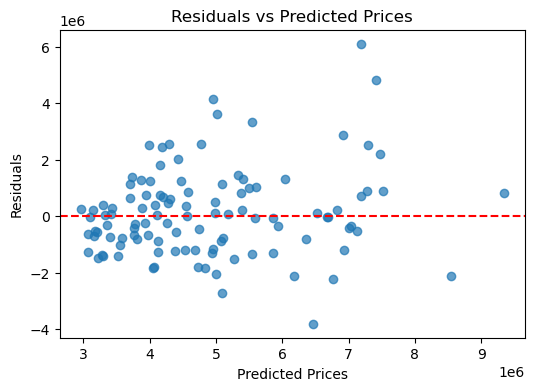

In [20]:

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

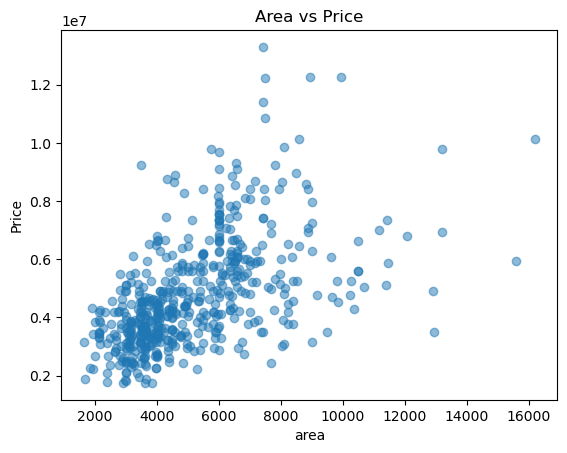

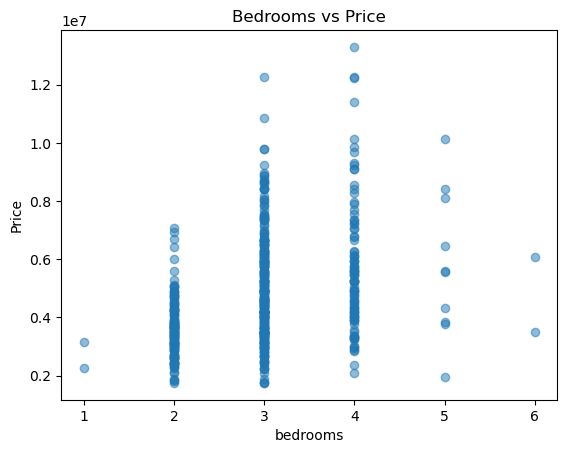

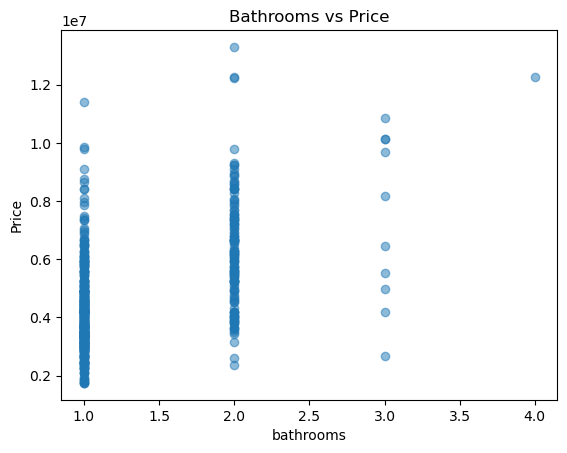

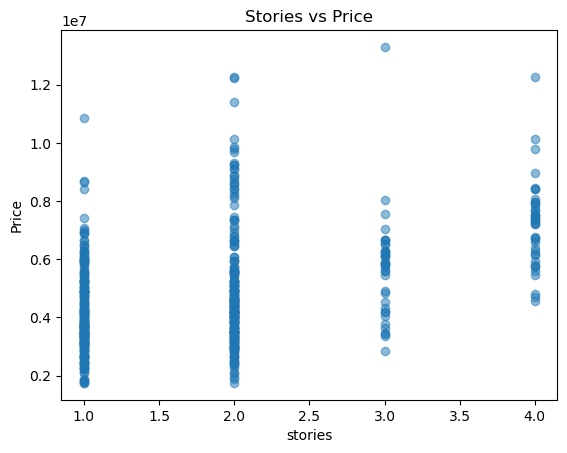

In [21]:
for col in ['area', 'bedrooms', 'bathrooms', 'stories']:
    plt.figure()
    plt.scatter(df[col], df['price'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'{col.capitalize()} vs Price')
    plt.show()

In [ ]:

from ipywidgets import interact, IntSlider, FloatText, Button, Output, VBox
from IPython.display import display
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler  # Import the scaler class

# Load the trained model
model = joblib.load('housing_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Create input widgets
sqft_widget = IntSlider(min=500, max=5000, step=50, description='Square Feet:')
bedrooms_widget = IntSlider(min=1, max=6, step=1, description='Bedrooms:')
bathrooms_widget = FloatText(value=1.0, description='Bathrooms:')
stories_widget = IntSlider(min=1, max=4, step=1, description='Stories:')  # Add stories widget

# Create a button and output area
predict_button = Button(description="Predict Price")
output_area = Output()

def predict_house_price(sqft, bedrooms, bathrooms, stories):  # Add stories parameter
    with output_area:
        output_area.clear_output()
        # Create a DataFrame for the input, ensuring column order matches training
        input_data = pd.DataFrame([[sqft, bedrooms, bathrooms, stories]], columns=['area', 'bedrooms', 'bathrooms', 'stories'])  # Use correct column names

        # Scale the input data using the same scaler fitted on training data
        input_scaled = scaler.transform(input_data)

        # Make prediction
        predicted_price = model.predict(input_scaled)[0]
        print(f"Predicted House Price:{predicted_price:,.2f} Rupees")

# Link the button to the prediction function
predict_button.on_click(lambda b: predict_house_price(sqft_widget.value, bedrooms_widget.value, bathrooms_widget.value, stories_widget.value))  # Pass stories value

# Display the widgets and output area
display(VBox([sqft_widget, bedrooms_widget, bathrooms_widget, stories_widget, predict_button, output_area]))  # Add stories widget to display